# 05 May 2025

1  Total Matches played by a specific country against sa pecific opponent
2. Total matches played in every n year (Note: 2) by country_1 and country_2 (Note: 1), country_3 (Note: 1), and plotted as a grouped bar chart

3. Time or Year against the Cumulative match and goals by countries
4. Average goals held in every match played by country_1 in every n years (Note: 2) and plot in a bar chart
5. Average goals held in every match played by country_1 against country_2 in every n years (Note: 2) and plot as a Grouped bar chart


6. Average Win/loss played by country_1 in every n years and plot in a bar chart
7. Average Win/loss played by country_1 against country_2 and country_3 in every n years, and plot as a Grouped bar chart
8. Average goal score played by country_1 against all other countries in every n years, and plot as a grouped bar chart
9. Average goal score played by country_1 against country_2 in every n years, and plot as a grouped bar chart
10. Average goal conceded by country_1 against all other countries every n years, and plot as a grouped bar chart
11. Average goal conceded played by country_1 against country_2 every n years, and plot as a grouped bar chart
12. Top n countries' highest score on average and graph in bubble plot and grouped bar chart
13. Top n countries highest concede on average and graphed in a bubble plot, grouped bar chart
14. Win/loss percentage in every n years by country_1 against all other countries, use a bar chart
15. Win/loss percentage in every n years by country_1 against country_2 and country_3 using a grouped bar chart
16. Average goal difference played by country_1 against all other countries every n years
17. Average goal difference played by country_1 against country_2 and country_3 in every n years


In [23]:
from IPython.display import display
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

df = pd.read_csv("Datasets/Sports_Football_1872_2025.csv")










# Country Color Coding
color_code = {
    "Finland": "#003580",  # Blue
    "Sweden": "#FECC02",  # Yellow  # FFDA00 
    "Norway": "#EF2B2D",  # Red
    "Estonia": "#0072CE",  # Blue
    "Denmark": "#C60C30",  # Red
    "Brazil": "#007A33",  # Green
    "France": "#002395",  # Blue
    "Germany": "#FFCC00",  # Black
    "Argentina": "#75AADB",  # Light Blue
    "England": "#D81E05",  # Red
    "Hungary": "#C84E42",  # Red
    "Italy": "#006400",  # Green
    "Bangladesh": "#006A4E",  # Green
    "India": "#FF9933",  # Saffron/Orange
    "South Korea": "#0F64CD",  # Saffron/Orange
    "Mexico": "#006341",  # Saffron/Orange
    "Saudi Arabia": "#165d31",  # Saffron/Orange
    "Egypt": "#C09300", 
    "United States": "#B31942", 
    "Spain": "#AA151B", 
    "Japan": "#BC002D",
    "Azerbaijan": "#0092BC",
    "Greece": "#0D5EAF",
    "Poland": "#DC143C",
    "Portugal": "#046A38",
    "Greece": "#0D5EAF",
    "Turkey": "#C8102E",
    "Wales": "#00B140",
    "Default": "#000000"
}

def get_country_color(country):
    """Helper function to get color for a country"""
    return color_code.get(country, color_code["Default"])

<h1 style="line-height:3rem;">1. Total Matches played by a specific country against specific opponent </h1>

In [85]:
def total_matches_count(df, team='Finland', opponents=['Sweden', 'Norway', 'Denmark'], interval=20, start_year=1880, end_year=2024):
    """
    Visualizes matches played by a specified team against opponents in time intervals.
    
    Args:
        df: DataFrame containing match data
        team: The main team to analyze (default 'Finland')
        opponents: List of opponent teams (default ['Sweden', 'Norway', 'Denmark'])
        interval: Years per time group (default 20)
        start_year: First year to include (default 1880)
        end_year: Last year to include (default 2024)
    """
    # Filter by year range first
    df = df.copy()
    df['Year'] = pd.to_datetime(df['Date']).dt.year
    df_filtered = df[(df['Year'] >= start_year) & (df['Year'] <= end_year)]
    
    # Filter matches where the team played against any of the opponents
    matches = df_filtered[
        ((df_filtered['Home_team'] == team) & (df_filtered['Away_team'].isin(opponents))) |
        ((df_filtered['Away_team'] == team) & (df_filtered['Home_team'].isin(opponents)))
    ].copy()
    
    # Create complete range of year groups
    min_year = matches['Year'].min() if not matches.empty else start_year
    max_year = matches['Year'].max() if not matches.empty else end_year
    all_year_groups = pd.DataFrame({
        'Year_Group': range((start_year // interval) * interval, 
                          ((end_year // interval) + 1) * interval, 
                          interval)
    })
    
    # Create time groups for matches
    matches['Year_Group'] = (matches['Year'] // interval) * interval
    
    # Create a table of matches against each opponent by time period
    results = []
    for opponent in opponents:
        # Filter matches against this opponent
        opp_matches = matches[
            ((matches['Home_team'] == team) & (matches['Away_team'] == opponent)) |
            ((matches['Away_team'] == team) & (matches['Home_team'] == opponent))
        ]
        
        # Count matches by time period
        counts = opp_matches['Year_Group'].value_counts().sort_index()
        
        # Create a Series with all time periods (including zeros)
        full_counts = pd.Series(0, index=all_year_groups['Year_Group'])
        full_counts.update(counts)
        
        results.append(full_counts)
    
    # Create the result DataFrame
    result_df = pd.concat(results, axis=1)
    result_df.columns = [f"{team} vs {opp}" for opp in opponents]
    
    # Calculate statistics before adding summary rows
    data_for_stats = result_df.copy()  # This contains only the year groups
    
    # Add summary rows
    result_df.loc['Total'] = data_for_stats.sum()
    result_df.loc['Average'] = data_for_stats.mean()  # Now correctly divided by number of periods
    result_df.loc['Std Dev'] = data_for_stats.std()   # Correct standard deviation
    
    # Create styled table
    styled_table = result_df.style
    
    # Apply gradient only to non-summary rows (exclude last 3 rows)
    non_summary_rows = result_df.index[:-3]
    styled_table = styled_table.background_gradient(
        cmap='Blues', 
        subset=(non_summary_rows, result_df.columns)
    )
    
    # Format numbers to show 2 decimal places for average and std dev
    styled_table = styled_table.format({
        'Average': '{:.2f}',
        'Std Dev': '{:.2f}'
    })
    
    # Display the table with styling
    print(f"\n{'='*70}\nMatch Count: {team} vs Opponents ({start_year}-{end_year}, {interval}-year intervals)\n{'='*70}")
    display(styled_table)
    
    return 0

# Example usage
total_matches_count(df, team='Finland', opponents=['Sweden', 'Norway', 'Denmark'], interval=10, start_year=1990, end_year=2024)


Match Count: Finland vs Opponents (1990-2024, 10-year intervals)


,Finland vs Sweden,Finland vs Norway,Finland vs Denmark
Year_Group,,,
1990,3.000000,2.000000,2.000000
2000,4.000000,3.000000,2.000000
2010,6.000000,1.000000,1.000000
2020,2.000000,1.000000,3.000000
Total,15.000000,7.000000,8.000000
Average,3.750000,1.750000,2.000000
Std Dev,1.707825,0.957427,0.816497


0

<h1 style="line-height:3rem;">2. Total matches played in every n year (Note: 2) by country_1 and country_2 (Note: 1), country_3 (Note: 1), and plotted as a grouped bar chart </h1>


Total Matches (1900-2020) - Top 5 Countries


,Sweden,Argentina,Brazil,Germany,England
Year_Group,,,,,
1896,51.000000,76.000000,15.000000,26.000000,53.000000
1920,187.000000,144.000000,60.000000,166.000000,105.000000
1944,189.000000,164.000000,209.000000,128.000000,200.000000
1968,236.000000,240.000000,269.000000,252.000000,262.000000
1992,312.000000,315.000000,383.000000,329.000000,271.000000
2016,63.000000,56.000000,57.000000,62.000000,59.000000
Avg,173.000000,165.833333,165.500000,160.500000,158.333333
STD,100.723384,98.351241,145.233261,114.580539,98.978112
Total,1038.000000,995.000000,993.000000,963.000000,950.000000


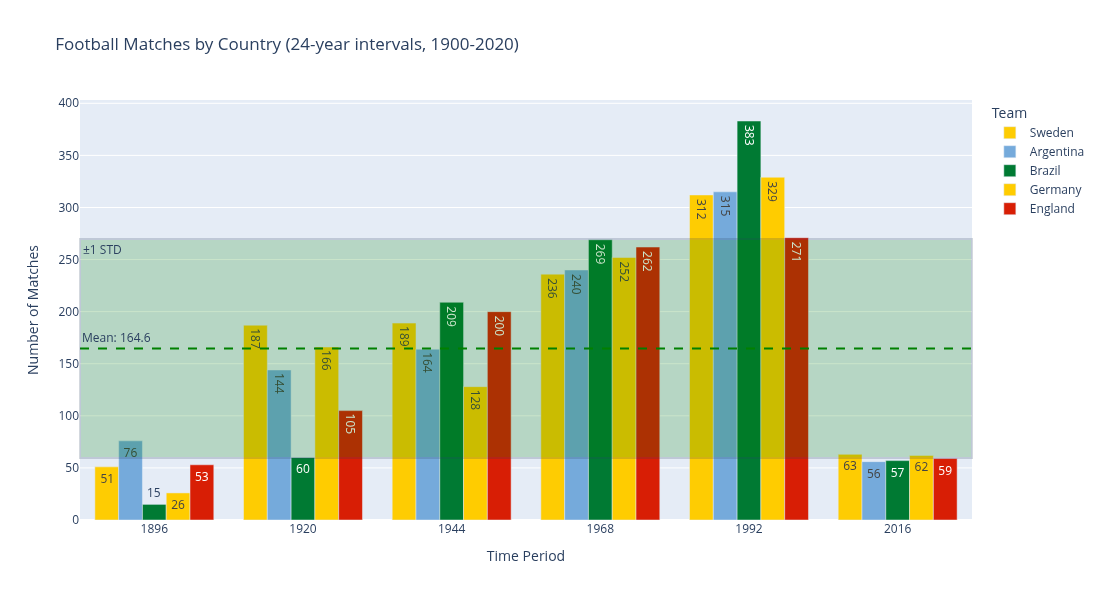

0


Total Matches (2010-2022) - Top 5 Countries


,Finland,Sweden,Norway,Denmark,Estonia
Year_Group,,,,,
2010,104.000000,127.000000,101.000000,107.000000,128.000000
2020,33.000000,36.000000,29.000000,37.000000,31.000000
Avg,68.500000,81.500000,65.000000,72.000000,79.500000
STD,50.204581,64.346717,50.911688,49.497475,68.589358
Total,137.000000,163.000000,130.000000,144.000000,159.000000


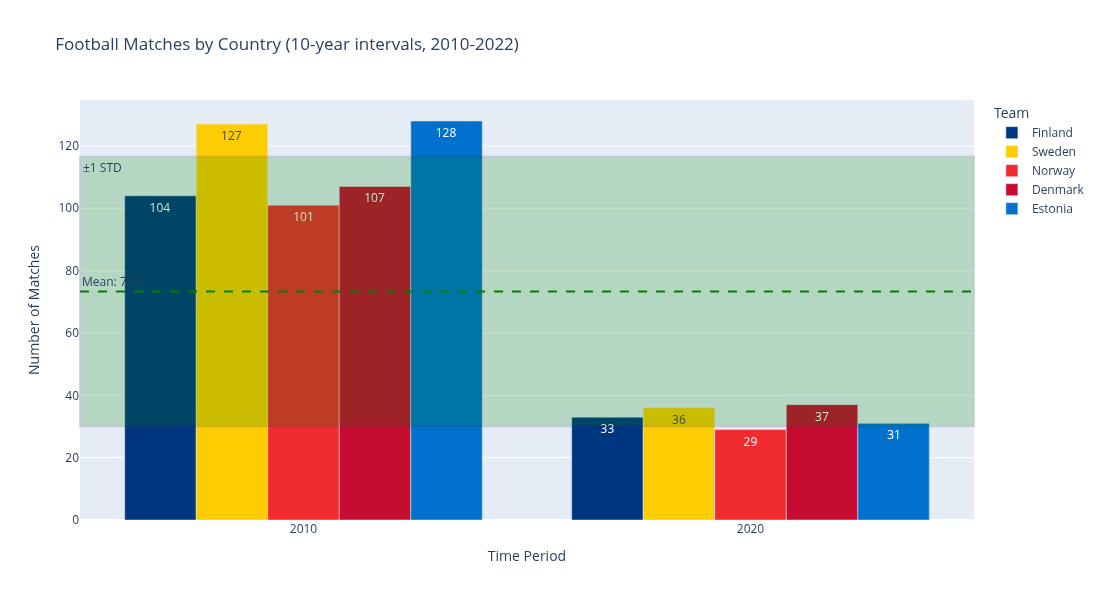

0

In [470]:

def plot_total_matches(df, countries=None, interval=20, top_n=10, start_year=1880, end_year=2024):
    """
    Visualizes total matches played by top countries in complete time intervals.
    Args:
        df: DataFrame containing match data
        countries: Optional list of countries to analyze
        interval: Years per time group (default 20)
        top_n: Number of top countries to show (default 10)
        start_year: First year to include (default 1880)
        end_year: Last year to include (default 2024)
    """
    # Filter by year range first
    df = df.copy()
    df['Year'] = pd.to_datetime(df['Date']).dt.year
    df_filtered = df[(df['Year'] >= start_year) & (df['Year'] <= end_year)]
    
    # Select top countries if none specified
    if not countries:
        total_matches = (df_filtered['Home_team'].value_counts() + 
                        df_filtered['Away_team'].value_counts())
        country_list = total_matches.nlargest(top_n).index.tolist()
    else:
        country_list = countries[:top_n]  # Limit to top_n even with specified countries

    # Filter for selected countries
    matches = df_filtered[
        (df_filtered['Home_team'].isin(country_list)) | 
        (df_filtered['Away_team'].isin(country_list))
    ].copy()
    
    # Create complete range of year groups
    min_year = matches['Year'].min() if not matches.empty else start_year
    max_year = matches['Year'].max() if not matches.empty else end_year
    all_year_groups = pd.DataFrame({
        'Year_Group': range((start_year // interval) * interval, 
                          ((end_year // interval) + 1) * interval, 
                          interval)
    })
    
    # Create time groups for matches
    matches['Year_Group'] = (matches['Year'] // interval) * interval
    
    # Melt to combine home/away teams
    melted = matches.melt(
        id_vars=['Year_Group'],
        value_vars=['Home_team', 'Away_team'],
        value_name='Team'
    )
    
    # Aggregate with all possible year groups
    group_data = melted.groupby(['Year_Group', 'Team']).size().unstack(fill_value=0)
    group_data = all_year_groups.merge(group_data.reset_index(), on='Year_Group', how='left').fillna(0)
    group_data = group_data.set_index('Year_Group')
    plot_data = group_data[country_list]
    plot_data_with_total = plot_data.copy()
    
    # Add summary rows
    plot_data_with_total.loc['Avg'] = plot_data.mean()
    plot_data_with_total.loc['STD'] = plot_data.std()
    plot_data_with_total.loc['Total'] = plot_data.sum()

    # Display data table with gradient
    print(f"\n{'='*50}\nTotal Matches ({start_year}-{end_year}) - Top {len(country_list)} Countries\n{'='*50}")
    display(plot_data_with_total.style.background_gradient(cmap='Blues', axis=0))

    # Prepare melted data for visualization
    plot_data_melted = plot_data.reset_index().melt(
        id_vars='Year_Group',
        value_vars=country_list,
        var_name='Team',
        value_name='Matches'
    )

    # Calculate stats
    avg_value = plot_data_melted['Matches'].mean()
    std_value = plot_data_melted['Matches'].std()
    
    # Create interactive bar chart with custom colors
    fig = px.bar(
        plot_data_melted,
        x='Year_Group',
        y='Matches',
        color='Team',
        color_discrete_map={country: get_country_color(country) for country in country_list},
        barmode='group',
        title=f'Football Matches by Country ({interval}-year intervals, {start_year}-{end_year})',
        labels={'Year_Group': 'Time Period', 'Matches': 'Number of Matches'},
        text_auto=True
    ).update_layout(
        height=600,
        width=1000,
        uniformtext_minsize=8,
        uniformtext_mode='hide'
    )
    
    # Add reference lines
    fig.add_hline(
        y=avg_value,
        line_dash="dash",
        line_color="green",
        annotation_text=f"Mean: {avg_value:.1f}",
        annotation_position="top left"
    )
    
    fig.add_hrect(
        y0=avg_value - std_value,
        y1=avg_value + std_value,
        fillcolor="green",
        opacity=0.2,
        annotation_text="±1 STD",
        annotation_position="top left"
    )
    
    fig.show()
    
    return 0

# Example Usage
df = pd.read_csv("Datasets/Sports_Football_1872_2025.csv")

# Example 1: Top 5 countries from 1950-2020 in 10-year intervals
plot_total_matches(df, interval=24, top_n=5, start_year=1900, end_year=2020)

# Example 2: Specific Nordic countries from 1990-2022
plot_total_matches(df, 
                  countries=['Finland', 'Sweden', 'Norway', 'Denmark', 'Estonia'], 
                  interval=10, 
                  start_year=2010, 
                  end_year=2022)

<h1 style="line-height:3rem;">3. Time or Year against the Cumulative match and goals by countries </h1>


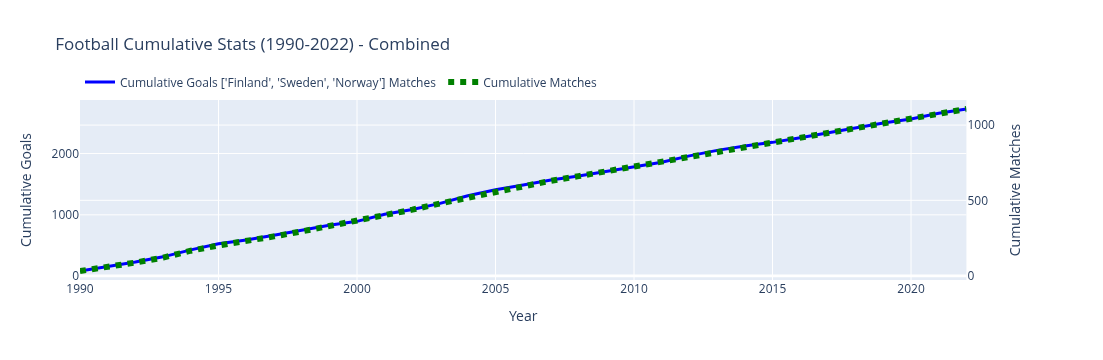

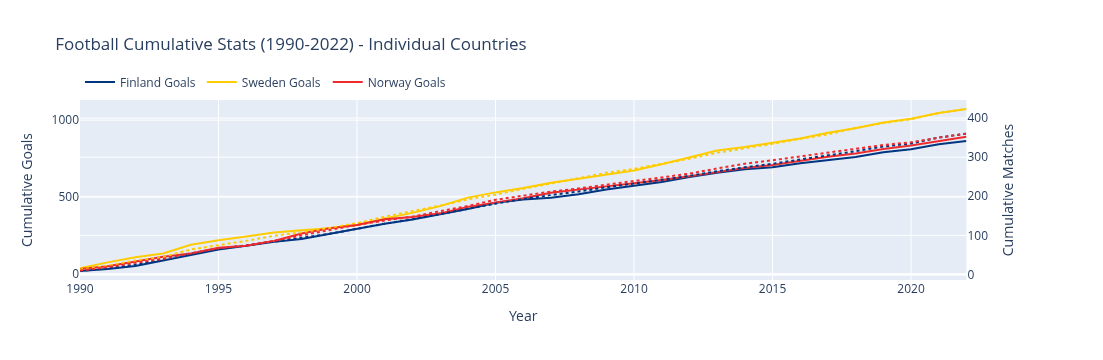

In [15]:
def plot_yearly_cumulative_stats(df, countries=None, start_year=1940, end_year=2024, individual=False):
    """
    Creates line graph with cumulative goals and matches by year
    
    Args:
        df: DataFrame with match data
        countries: List of countries to filter (None for all)
        start_year: First year to include
        end_year: Last year to include
        individual: Show separate lines for each country (default False)
    
    Returns:
        Plotly figure object
    """
    # Filter and process data
    df = df.copy()
    df['Year'] = pd.to_datetime(df['Date']).dt.year
    df = df[(df['Year'] >= start_year) & (df['Year'] <= end_year)].copy()

    # Filter by countries if specified
    if countries:
        mask = df['Home_team'].isin(countries) | df['Away_team'].isin(countries)
        df = df[mask].copy()

        # Add country column for individual tracing
        if individual:
            df['Team'] = df.apply(lambda x: x['Home_team'] if x['Home_team'] in countries else x['Away_team'], axis=1)

    # Sort by year after filtering
    df = df.sort_values('Year')

    # Create figure with secondary y-axis
    fig = make_subplots(specs=[[{"secondary_y": True}]])

    if individual and countries:
        # Individual country traces with custom colors
        for country in countries:
            country_df = df[(df['Home_team'] == country) | (df['Away_team'] == country)].copy()
            yearly_stats = country_df.groupby('Year').agg(
                Yearly_Home_Goals=('home_score', 'sum'),
                Yearly_Away_Goals=('away_score', 'sum'),
                Yearly_Matches=('Home_team', 'count')
            ).reset_index()

            yearly_stats['Yearly_Goals'] = yearly_stats['Yearly_Home_Goals'] + yearly_stats['Yearly_Away_Goals']
            yearly_stats[['Cumulative_Goals', 'Cumulative_Matches']] = yearly_stats[['Yearly_Goals', 'Yearly_Matches']].cumsum()

            country_color = get_country_color(country)
            
            # Goals trace
            fig.add_trace(
                go.Scatter(
                    x=yearly_stats['Year'],
                    y=yearly_stats['Cumulative_Goals'],
                    name=f'{country} Goals',
                    line=dict(color=country_color, width=2),
                    hovertemplate=f"{country}<br>Year: %{{x}}<br>Goals: %{{y:,}}<extra></extra>",
                    legendgroup=country
                ),
                secondary_y=False
            )
            
            # Matches trace (dotted line with same color)
            fig.add_trace(
                go.Scatter(
                    x=yearly_stats['Year'],
                    y=yearly_stats['Cumulative_Matches'],
                    name=f'{country} Matches',
                    line=dict(color=country_color, width=2, dash='dot'),
                    hovertemplate=f"{country}<br>Year: %{{x}}<br>Matches: %{{y:,}}<extra></extra>",
                    legendgroup=country,
                    showlegend=False
                ),
                secondary_y=True
            )
    else:
        # Combined statistics
        yearly_stats = df.groupby('Year').agg(
            Yearly_Home_Goals=('home_score', 'sum'),
            Yearly_Away_Goals=('away_score', 'sum'),
            Yearly_Matches=('Home_team', 'count')
        ).reset_index()

        yearly_stats['Yearly_Goals'] = yearly_stats['Yearly_Home_Goals'] + yearly_stats['Yearly_Away_Goals']
        yearly_stats[['Cumulative_Goals', 'Cumulative_Matches']] = yearly_stats[['Yearly_Goals', 'Yearly_Matches']].cumsum()

        # Combined goals line (using default blue)
        fig.add_trace(
            go.Scatter(
                x=yearly_stats['Year'],
                y=yearly_stats['Cumulative_Goals'],
                name=f'Cumulative Goals {countries} Matches',
                line=dict(color='blue', width=3),
                hovertemplate="Year: %{x}<br>Goals: %{y:,}<extra></extra>"
            ),
            secondary_y=False
        )

        # Combined matches line (using default green)
        fig.add_trace(
            go.Scatter(
                x=yearly_stats['Year'],
                y=yearly_stats['Cumulative_Matches'],
                name='Cumulative Matches',
                line=dict(color='green', width=6, dash='dot'),
                hovertemplate="Year: %{x}<br>Matches: %{y:,}<extra></extra>"
            ),
            secondary_y=True
        )

    # Layout
    title = f'Football Cumulative Stats ({start_year}-{end_year})'
    if countries:
        title += f' - {"Individual Countries" if individual else "Combined"}'

    fig.update_layout(
        title=title,
        xaxis_title='Year',
        hovermode='x unified',
        height=600,
        legend=dict(orientation="h", yanchor="bottom", y=1.02)
    )

    # Y-axis titles
    fig.update_yaxes(
        title_text="Cumulative Goals",
        secondary_y=False
    )
    fig.update_yaxes(
        title_text="Cumulative Matches",
        secondary_y=True
    )

    return fig

# Example Usage
df = pd.read_csv("Datasets/Sports_Football_1872_2025.csv")

# Example 1: Combined view for Nordic countries
fig1 = plot_yearly_cumulative_stats(df,
                                  countries=['Finland', 'Sweden', 'Norway'],
                                  start_year=1990,
                                  end_year=2022,
                                  individual=False)
fig1.show()

# Example 2: Individual traces for Nordic countries
fig2 = plot_yearly_cumulative_stats(df,
                                  countries=['Finland', 'Sweden', 'Norway'],
                                  start_year=1990,
                                  end_year=2022,
                                  individual=True)
fig2.show()

<h1 style="line-height:3rem;">4. Box Plot of Average Goals Per Match </h1>

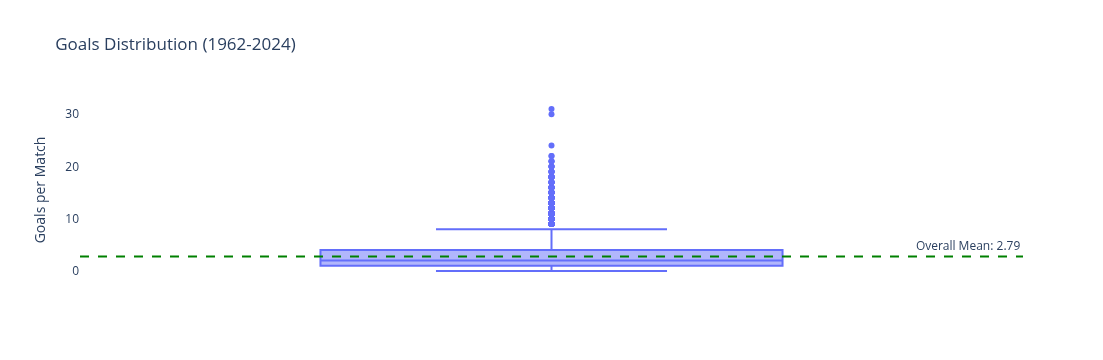

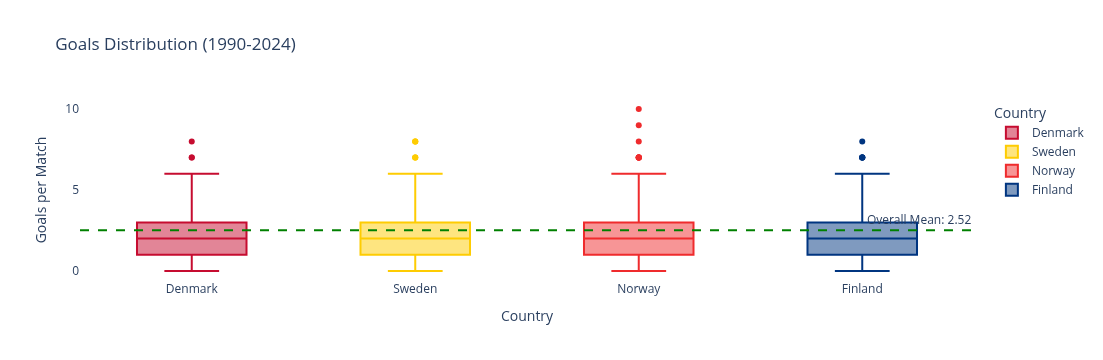

In [17]:
df = pd.read_csv("Datasets/Sports_Football_1872_2025.csv")



def goals_distribution_boxplot(df, countries=None, start_year=1960, end_year=2024):
    """
    Creates a box plot showing distribution of total goals per match
    with optional filtering by countries and year range
    
    Args:
        df: DataFrame containing match data
        countries: List of countries to filter (None for all)
        start_year: First year to include (default 1960)
        end_year: Last year to include (default 2024)
    
    Returns:
        Plotly figure object
    """
    # Create copy and filter by year
    df = df.copy()
    df['Year'] = pd.to_datetime(df['Date']).dt.year
    df = df[(df['Year'] >= start_year) & (df['Year'] <= end_year)]
    
    # Filter by countries if specified
    if countries:
        df = df[df['Home_team'].isin(countries) | df['Away_team'].isin(countries)]
    
    # Calculate total goals per match
    df['Total_Goals'] = df['home_score'] + df['away_score']
    
    # Create box plot with optional facet by country
    if countries:
        # Melt to combine home/away teams for country filtering
        melted = df.melt(
            id_vars=['Total_Goals', 'Year'],
            value_vars=['Home_team', 'Away_team'],
            value_name='Team'
        )
        melted = melted[melted['Team'].isin(countries)]
        
        # Create custom color mapping for the countries
        color_map = {country: get_country_color(country) for country in countries}
        
        fig = px.box(
            melted,
            x='Team',
            y='Total_Goals',
            title=f'Goals Distribution ({start_year}-{end_year})',
            labels={'Total_Goals': 'Goals per Match', 'Team': 'Country'},
            height=500,
            color='Team',
            color_discrete_map=color_map
        )
    else:
        fig = px.box(
            df,
            y='Total_Goals',
            title=f'Goals Distribution ({start_year}-{end_year})',
            labels={'Total_Goals': 'Goals per Match'},
            height=500
        )
    
    # Customize appearance
    fig.update_layout(
        yaxis_title='Goals per Match',
        showlegend=bool(countries),  # Only show legend if multiple countries
        plot_bgcolor='white',
        xaxis_title='Country' if countries else None
    )
    
    # Add mean line
    mean_goals = df['Total_Goals'].mean()
    fig.add_hline(
        y=mean_goals,
        line_dash="dash",
        line_color="green",
        annotation_text=f"Overall Mean: {mean_goals:.2f}",
        annotation_position="top right"
    )
    
    return fig

# Usage examples:
# All matches since 1920
fig1 = goals_distribution_boxplot(df, start_year=1962)
fig1.show()

# Specific countries comparison
fig2 = goals_distribution_boxplot(df, 
                                countries=['Finland', 'Sweden', 'Norway', 'Denmark', "Germany"],
                                start_year=1990, end_year=2024)
fig2.show()

<h1 style="line-height:3rem;">5. Average goals held in every match played by country_1 in every n years </h1>


Average Goals Per Match (1980-2022) - 10-year intervals


,Brazil,Egypt,France,Germany,Japan,Mexico,Saudi Arabia,South Korea,Spain,United States,Total_Matches
1980,2.626087,1.859813,2.534091,2.772727,2.276316,2.616279,2.413793,2.578571,2.529412,2.057692,992.000000
1990,3.075472,2.375796,2.470000,2.852713,2.952756,2.841530,2.782609,2.690323,3.000000,2.389744,1464.000000
2000,2.842767,2.717105,2.452555,3.300000,2.611765,2.747368,2.680851,2.298246,2.676923,2.591716,1606.000000
2010,2.774648,2.549180,2.604478,3.404412,2.902597,2.674157,2.572464,2.516129,3.068182,2.829114,1449.000000
2020,2.636364,2.031250,3.051282,3.583333,2.823529,2.166667,1.818182,2.968750,2.666667,2.523810,368.000000
Total_Matches_Played,608.000000,570.000000,498.000000,551.000000,561.000000,685.000000,636.000000,653.000000,501.000000,616.000000,nan
Avg_Matches_Per_Period,121.600000,114.000000,99.600000,110.200000,112.200000,137.000000,127.200000,130.600000,100.200000,123.200000,nan
StdDev_Matches_Per_Period,52.700000,50.300000,40.000000,43.000000,56.400000,65.400000,59.100000,56.200000,37.600000,70.900000,nan
Avg_Goals_Total_Period,2.840000,2.390000,2.560000,3.130000,2.740000,2.700000,2.590000,2.540000,2.810000,2.540000,nan
StdDev_Goals_Total_Period,1.850000,1.830000,1.730000,2.040000,1.990000,1.800000,1.770000,1.840000,1.840000,1.710000,nan


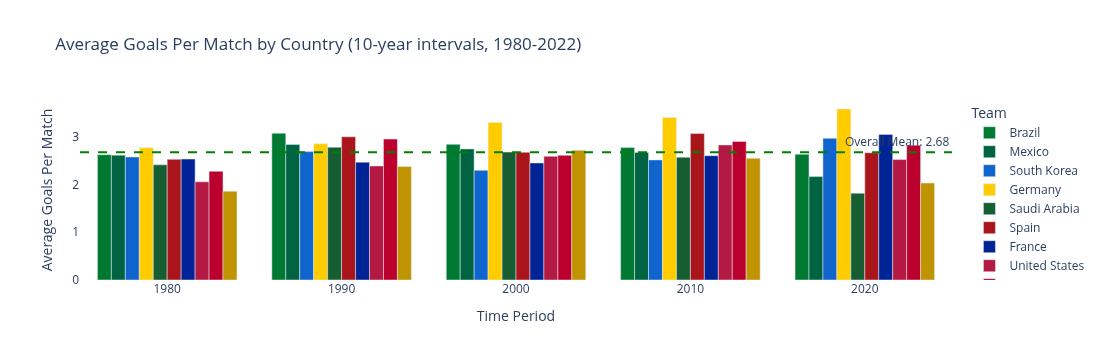


Average Goals Per Match (1990-2020) - 5-year intervals


,Argentina,Brazil,France,Germany,Total_Matches
1990,2.290323,2.735294,2.642857,2.870968,234.000000
1995,2.531250,3.329670,2.344828,2.835821,280.000000
2000,2.830508,2.752941,2.718310,3.205882,283.000000
2005,2.764706,2.945946,2.166667,3.388889,280.000000
2010,2.863014,3.013333,2.298507,3.547945,288.000000
2015,2.791045,2.507463,2.910448,3.238095,264.000000
2020,2.000000,3.500000,3.375000,3.750000,24.000000
Total_Matches_Played,397.000000,464.000000,379.000000,413.000000,nan
Avg_Matches_Per_Period,56.700000,66.300000,54.100000,59.000000,nan
StdDev_Matches_Per_Period,23.700000,28.800000,22.500000,22.900000,nan


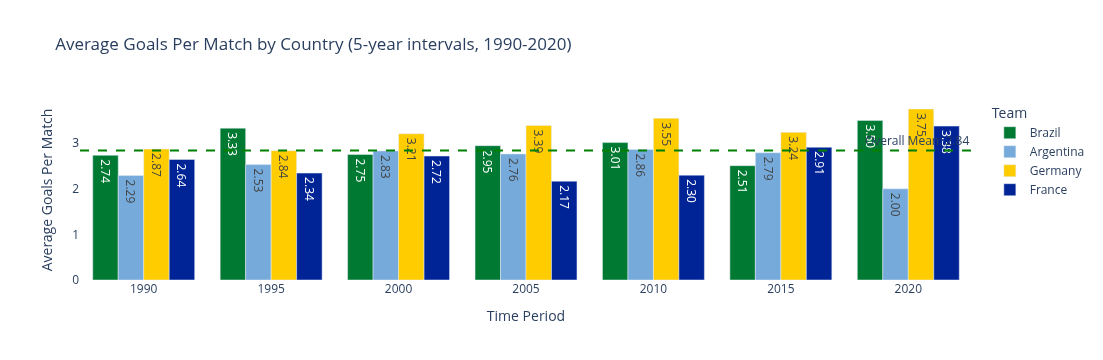

In [42]:
def average_goals_by_period(df, countries=None, interval=10, top_n=5, start_year=1880, end_year=2024):
    """
    Calculates and visualizes average goals per match by country in time intervals.
    
    Args:
        df: DataFrame containing match data
        countries: List of countries to analyze (None for top 10)
        interval: Years per time group (default 10)
        top_n: Number of top countries to show if countries=None
        start_year: First year to include (default 1880)
        end_year: Last year to include (default 2024)
    
    Returns:
        Plotly figure object
    """
    # Filter by year range
    df = df.copy()
    df['Year'] = pd.to_datetime(df['Date']).dt.year
    df = df[(df['Year'] >= start_year) & (df['Year'] <= end_year)]
    
    # Select countries if not specified
    if not countries:
        # Get top countries by win count
        home_wins = df[df['home_score'] > df['away_score']]['Home_team'].value_counts()
        away_wins = df[df['away_score'] > df['home_score']]['Away_team'].value_counts()
        total_wins = home_wins.add(away_wins, fill_value=0)
        countries = total_wins.nlargest(top_n).index.tolist()
    
    # Filter matches involving our selected countries
    matches = df[
        (df['Home_team'].isin(countries)) | 
        (df['Away_team'].isin(countries))
    ].copy()
    
    # Create time intervals
    matches['Year_Group'] = (matches['Year'] // interval) * interval
    matches['Total_Goals'] = matches['home_score'] + matches['away_score']
    
    # Melt to combine home/away teams
    melted = matches.melt(
        id_vars=['Year_Group', 'Total_Goals'],
        value_vars=['Home_team', 'Away_team'],
        value_name='Team'
    )
    
    # Filter to only include our selected countries
    melted = melted[melted['Team'].isin(countries)]
    
    # Calculate average goals by team and period
    avg_goals = melted.groupby(['Year_Group', 'Team'])['Total_Goals'].mean().unstack()
    
    # Calculate match counts by team and period
    match_counts = melted.groupby(['Year_Group', 'Team']).size().unstack()
    
    # Fill any missing periods with 0
    all_periods = pd.DataFrame({
        'Year_Group': range((start_year // interval) * interval, 
                          ((end_year // interval) + 1) * interval, 
                          interval)
    })
    
    # Merge and fill NA for both metrics
    avg_goals = all_periods.merge(avg_goals.reset_index(), on='Year_Group', how='left').fillna(0)
    match_counts = all_periods.merge(match_counts.reset_index(), on='Year_Group', how='left').fillna(0)
    
    # Set index for both dataframes
    avg_goals = avg_goals.set_index('Year_Group')
    match_counts = match_counts.set_index('Year_Group')
    
    # Add total matches column (sum across all countries for each period)
    avg_goals['Total_Matches'] = match_counts.sum(axis=1)
    
    # Calculate goal statistics for each country across all periods
    goal_stats = melted.groupby('Team')['Total_Goals'].agg(['mean', 'std']).round(2)
    
    # Create summary rows
    total_matches_played = match_counts.sum().to_frame('Total_Matches_Played').T
    avg_matches_per_period = match_counts.mean().to_frame('Avg_Matches_Per_Period').T.round(1)
    std_matches_per_period = match_counts.std().to_frame('StdDev_Matches_Per_Period').T.round(1)
    avg_goals_total = goal_stats['mean'].to_frame('Avg_Goals_Total_Period').T
    std_goals_total = goal_stats['std'].to_frame('StdDev_Goals_Total_Period').T
    
    # Combine all data for display
    display_df = pd.concat([
        avg_goals,
        total_matches_played,
        avg_matches_per_period,
        std_matches_per_period,
        avg_goals_total,
        std_goals_total
    ])
    
    # Display data table with styling
    print(f"\n{'='*60}")
    print(f"Average Goals Per Match ({start_year}-{end_year}) - {interval}-year intervals")
    print(f"{'='*60}")
    
    # Style the dataframe
    styled_df = display_df.style
    
    # Apply gradient only to country columns in the main data (excluding summary rows)
    for country in countries:
        styled_df = styled_df.background_gradient(
            subset=(display_df.index[:-5], [country]),  # Exclude last 5 rows
            cmap='Reds'
        )
    
    # Set white background for:
    # 1. Total_Matches column in all rows
    # 2. All summary rows (last 5 rows)
    summary_rows = ['Total_Matches_Played', 'Avg_Matches_Per_Period', 
                   'StdDev_Matches_Per_Period', 'Avg_Goals_Total_Period',
                   'StdDev_Goals_Total_Period']
    
    styled_df = styled_df.apply(
        lambda x: ['background: white' 
                   if (x.name == 'Total_Matches' or 
                       x.name in summary_rows) 
                   else '' 
                   for i in x],
        axis=0
    )
    
    display(styled_df)
    
    # Prepare data for visualization (using original avg_goals without the extra columns/rows)
    plot_data = avg_goals.drop(columns=['Total_Matches']).reset_index().melt(
        id_vars='Year_Group',
        value_vars=countries,
        var_name='Team',
        value_name='Avg_Goals'
    )
    
    # Create interactive bar chart
    fig = px.bar(
        plot_data,
        x='Year_Group',
        y='Avg_Goals',
        color='Team',
        color_discrete_map={country: get_country_color(country) for country in countries},
        barmode='group',
        title=f'Average Goals Per Match by Country ({interval}-year intervals, {start_year}-{end_year})',
        labels={'Year_Group': 'Time Period', 'Avg_Goals': 'Average Goals'},
        text_auto='.2f',
        height=600
    )
    
    # Customize layout
    fig.update_layout(
        xaxis_title='Time Period',
        yaxis_title='Average Goals Per Match',
        plot_bgcolor='white',
        uniformtext_minsize=8,
        uniformtext_mode='hide'
    )
    
    # Add reference lines
    overall_avg = melted['Total_Goals'].mean()
    fig.add_hline(
        y=overall_avg,
        line_dash="dash",
        line_color="green",
        annotation_text=f"Overall Mean: {overall_avg:.2f}",
        annotation_position="top right"
    )
    
    return fig


# Example Usage
df = pd.read_csv("Datasets/Sports_Football_1872_2025.csv")

# Example 1: Top countries in 10-year intervals
fig1 = average_goals_by_period(df, interval=10, top_n=10, start_year=1980, end_year=2022)
fig1.show()

# Example 2: Specific countries in 5-year intervals
fig2 = average_goals_by_period(df, 
                              countries=['Brazil', 'Argentina', 'Germany', 'France'], 
                              interval=5, 
                              start_year=1990, 
                              end_year=2020)
fig2.show()

<h1 style="line-height:3rem;">6. Average goals held in every match played by country_1 against country_2 in every n years </h1>



Average Total Goals in Matches: Finland vs Sweden, Norway, Denmark
Time Period: 1990-2024 (10-year intervals)


,Denmark,Norway,Sweden
1990,2.000000,3.000000,4.000000
2000,1.500000,3.666667,1.500000
2010,3.000000,2.000000,2.666667
2020,2.000000,2.000000,2.000000
Total_Matches_Played,8.000000,7.000000,15.000000
Avg_Goals_Total_Period,2.000000,3.000000,2.530000
StdDev_Goals_Total_Period,1.200000,1.290000,1.810000


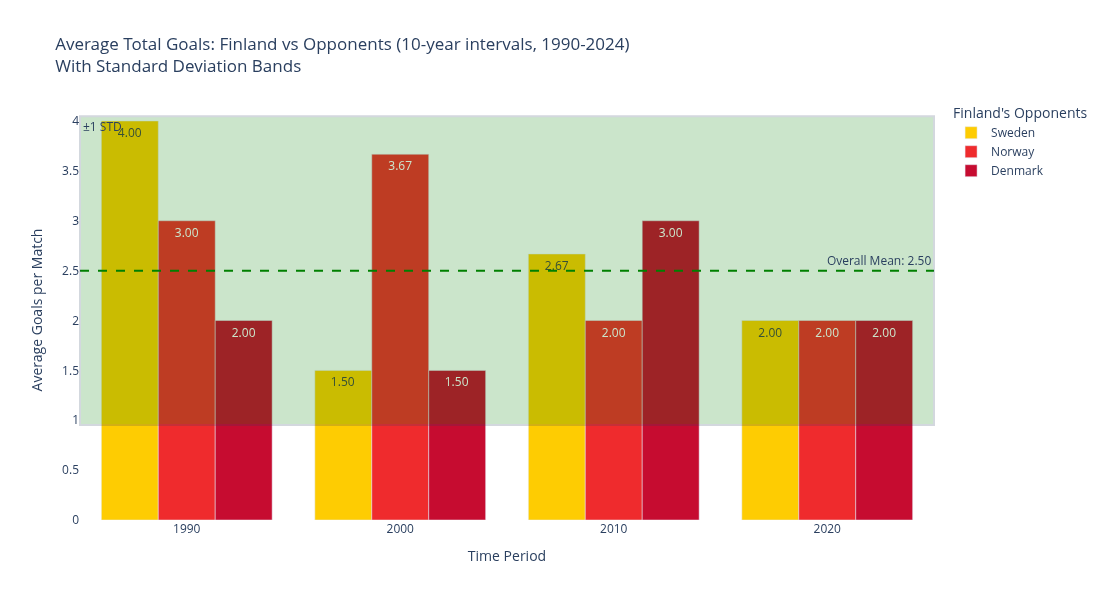


Average Total Goals in Matches: Germany vs Brazil, Argentina, France, Italy
Time Period: 1960-2020 (10-year intervals)


,Argentina,Brazil,France,Italy
1960,0.000000,3.000000,4.000000,1.000000
1970,4.000000,1.333333,2.000000,2.500000
1980,2.666667,2.600000,3.400000,2.000000
1990,2.000000,4.000000,2.000000,1.500000
2000,2.750000,3.000000,1.333333,2.666667
2010,3.333333,4.666667,2.250000,2.333333
2020,0.000000,0.000000,0.000000,0.000000
Total_Matches_Played,22.000000,23.000000,23.000000,24.000000
Avg_Goals_Total_Period,2.860000,3.130000,2.570000,2.080000
StdDev_Goals_Total_Period,1.670000,1.790000,1.670000,1.840000


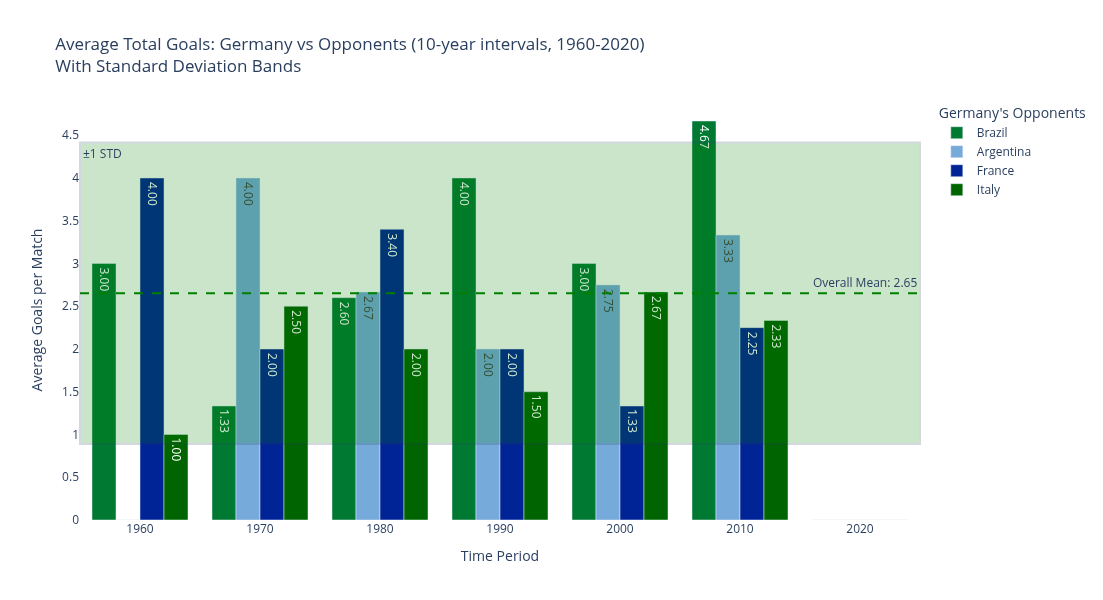

In [95]:
def total_average_goals_specific_teams(df, interval=10, team_1="Finland", opposite_teams=["Sweden", "Norway", "Denmark"], start_year=1990, end_year=2024):
    """
    Calculates and visualizes average goals in matches between team_1 and specified opponents over time intervals.
    Includes mean line and standard deviation band in the visualization.
    
    Args:
        df: DataFrame containing match data
        interval: Years per time group (default 10)
        team_1: Primary team to analyze (default "Finland")
        opposite_teams: List of opponent teams (default ["Sweden", "Norway", "Denmark"])
        start_year: First year to include (default 1990)
        end_year: Last year to include (default 2024)
    
    Returns:
        Plotly figure object
    """
    # Filter by year range
    df = df.copy()
    df['Year'] = pd.to_datetime(df['Date']).dt.year
    df = df[(df['Year'] >= start_year) & (df['Year'] <= end_year)]
    
    # Filter matches where team_1 played against any of the opposite_teams
    matches = df[
        ((df['Home_team'] == team_1) & (df['Away_team'].isin(opposite_teams))) |
        ((df['Away_team'] == team_1) & (df['Home_team'].isin(opposite_teams)))
    ].copy()
    
    # Create time intervals
    matches['Year_Group'] = (matches['Year'] // interval) * interval
    matches['Total_Goals'] = matches['home_score'] + matches['away_score']
    
    # Determine if team_1 was home or away and get opponent
    matches['Opponent'] = matches.apply(
        lambda x: x['Away_team'] if x['Home_team'] == team_1 else x['Home_team'],
        axis=1
    )
    
    # Calculate average goals by opponent and period
    avg_goals = matches.groupby(['Year_Group', 'Opponent'])['Total_Goals'].agg(['mean', 'std']).unstack()
    
    # Fill any missing periods with 0 for mean, NaN for std
    all_periods = pd.DataFrame({
        'Year_Group': range((start_year // interval) * interval, 
                          ((end_year // interval) + 1) * interval, 
                          interval)
    })
    
    # Merge mean and std separately
    avg_means = all_periods.merge(
        avg_goals['mean'].reset_index(), 
        on='Year_Group', 
        how='left'
    ).fillna(0).set_index('Year_Group')
    
    avg_stds = all_periods.merge(
        avg_goals['std'].reset_index(), 
        on='Year_Group', 
        how='left'
    ).set_index('Year_Group')
    
    # Calculate total matches played against each opponent
    total_matches = matches['Opponent'].value_counts().to_frame('Total_Matches_Played').T
    
    # Calculate overall average and std for each opponent
    overall_stats = matches.groupby('Opponent')['Total_Goals'].agg(['mean', 'std']).round(2)
    overall_avg = overall_stats['mean'].to_frame('Avg_Goals_Total_Period').T
    overall_std = overall_stats['std'].to_frame('StdDev_Goals_Total_Period').T
    
    # Combine all data for display
    display_df = pd.concat([
        avg_means,
        total_matches,
        overall_avg,
        overall_std
    ])
    
    # Display data table with styling
    print(f"\n{'='*80}")
    print(f"Average Total Goals in Matches: {team_1} vs {', '.join(opposite_teams)}")
    print(f"Time Period: {start_year}-{end_year} ({interval}-year intervals)")
    print(f"{'='*80}")
    
    # Style the dataframe - only apply gradient to the period data (first part of display_df)
    styled_df = display_df.style
    for opponent in opposite_teams:
        if opponent in display_df.columns:
            styled_df = styled_df.background_gradient(
                subset=(avg_means.index, [opponent]),
                cmap='Blues'
            )
    
    # Set white background for summary rows
    summary_rows = ['Total_Matches_Played', 'Avg_Goals_Total_Period', 'StdDev_Goals_Total_Period']
    styled_df = styled_df.apply(
        lambda x: ['background: white' if x.name in summary_rows else '' for i in x],
        axis=0
    )
    
    display(styled_df)
    
    # Prepare data for visualization
    plot_data = avg_means.reset_index().melt(
        id_vars='Year_Group',
        value_vars=[col for col in opposite_teams if col in avg_means.columns],
        var_name='Opponent',
        value_name='Avg_Goals'
    )
    
    # Get std values for each opponent
    std_data = avg_stds.reset_index().melt(
        id_vars='Year_Group',
        value_vars=[col for col in opposite_teams if col in avg_stds.columns],
        var_name='Opponent',
        value_name='Std_Goals'
    )
    
    # Merge mean and std data
    plot_data = plot_data.merge(std_data, on=['Year_Group', 'Opponent'])
    
    # Create interactive bar chart
    fig = px.bar(
        plot_data,
        x='Year_Group',
        y='Avg_Goals',
        color='Opponent',
        color_discrete_map={team: get_country_color(team) for team in opposite_teams},
        barmode='group',
        title=f'Average Total Goals: {team_1} vs Opponents ({interval}-year intervals, {start_year}-{end_year})<br>With Standard Deviation Bands',
        labels={'Year_Group': 'Time Period', 'Avg_Goals': 'Average Goals per Match'},
        text_auto='.2f',
        height=600
    )
    
    # Customize layout
    fig.update_layout(
        xaxis_title='Time Period',
        yaxis_title='Average Goals per Match',
        plot_bgcolor='white',
        uniformtext_minsize=8,
        uniformtext_mode='hide',
        legend_title_text=f'{team_1}\'s Opponents'
    )
    
    # Add reference lines
    overall_avg_all = matches['Total_Goals'].mean()
    overall_std_all = matches['Total_Goals'].std()
    
    fig.add_hline(
        y=overall_avg_all,
        line_dash="dash",
        line_color="green",
        annotation_text=f"Overall Mean: {overall_avg_all:.2f}",
        annotation_position="top right"
    )
    
    fig.add_hrect(
        y0=overall_avg_all - overall_std_all,
        y1=overall_avg_all + overall_std_all,
        fillcolor="green",
        opacity=0.2,
        annotation_text="±1 STD",
        annotation_position="top left"
    )
    
    return fig

# Example Usage
df = pd.read_csv("Datasets/Sports_Football_1872_2025.csv")

# Example 1: Finland vs Nordic rivals in 5-year intervals
fig1 = total_average_goals_specific_teams(df, interval=10, team_1="Finland", 
                                         opposite_teams=["Sweden", "Norway", "Denmark"],
                                         start_year=1990, end_year=2024)
fig1.show()

# Example 2: Germany vs strong opponents in 10-year intervals
fig2 = total_average_goals_specific_teams(df, interval=10, team_1="Germany",
                                         opposite_teams=["Brazil", "Argentina", "France", "Italy"],
                                         start_year=1960, end_year=2020)
fig2.show()

<h1 style="line-height:3rem;">
7. Average Win/loss played by country_1 in every n years and plot in a bar chart
</h1>


<h1 style="line-height:3rem;">8. Average goal scored and conceded played by team_1 against opposite_team in every n years, and plot as a grouped bar chart and stack. 
</h1>


Goal Analysis for Finland vs Sweden, Norway, Denmark, Estonia
Time Period: 1990-2024 (10-year intervals)

Average Goals Scored:


Opponent,Denmark,Estonia,Norway,Sweden
Year_Group,,,,
1990,0.500000,3.000000,0.500000,0.666667
2000,0.500000,2.333333,1.666667,0.500000
2010,1.000000,1.250000,0.000000,0.500000
2020,0.666667,0.666667,1.000000,0.000000



Average Goals Conceded:


Opponent,Denmark,Estonia,Norway,Sweden
Year_Group,,,,
1990,1.500000,0.666667,2.500000,3.333333
2000,1.000000,1.666667,2.000000,1.000000
2010,2.000000,0.875000,2.000000,2.166667
2020,1.333333,1.000000,1.000000,2.000000



Average Goal Difference:


Opponent,Denmark,Estonia,Norway,Sweden
Year_Group,,,,
1990,-1.000000,2.333333,-2.000000,-2.666667
2000,-0.500000,0.666667,-0.333333,-0.500000
2010,-1.000000,0.375000,-2.000000,-1.666667
2020,-0.666667,-0.333333,0.000000,-2.000000


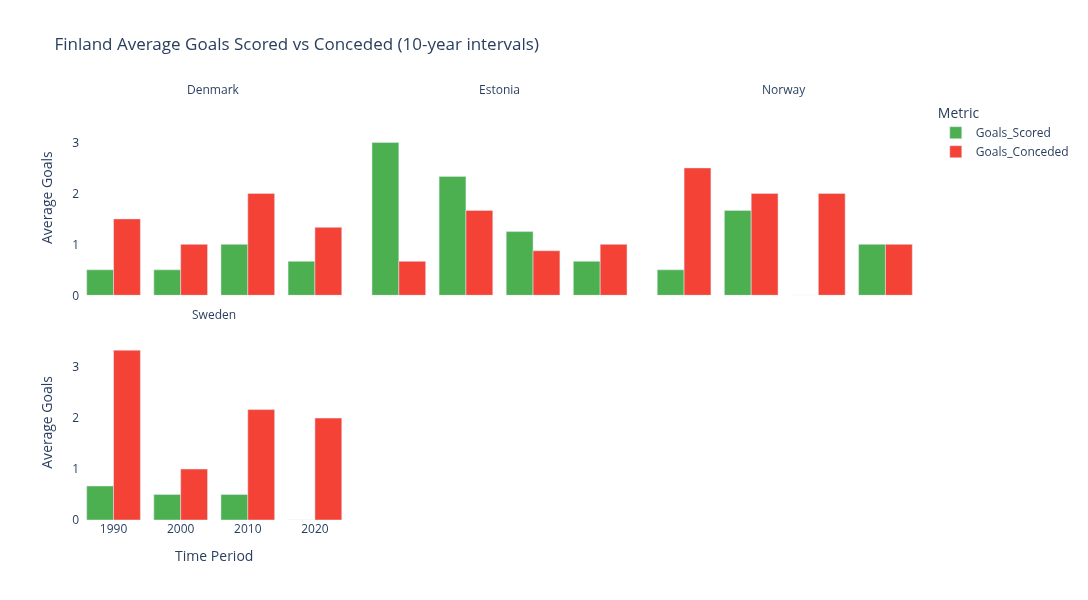

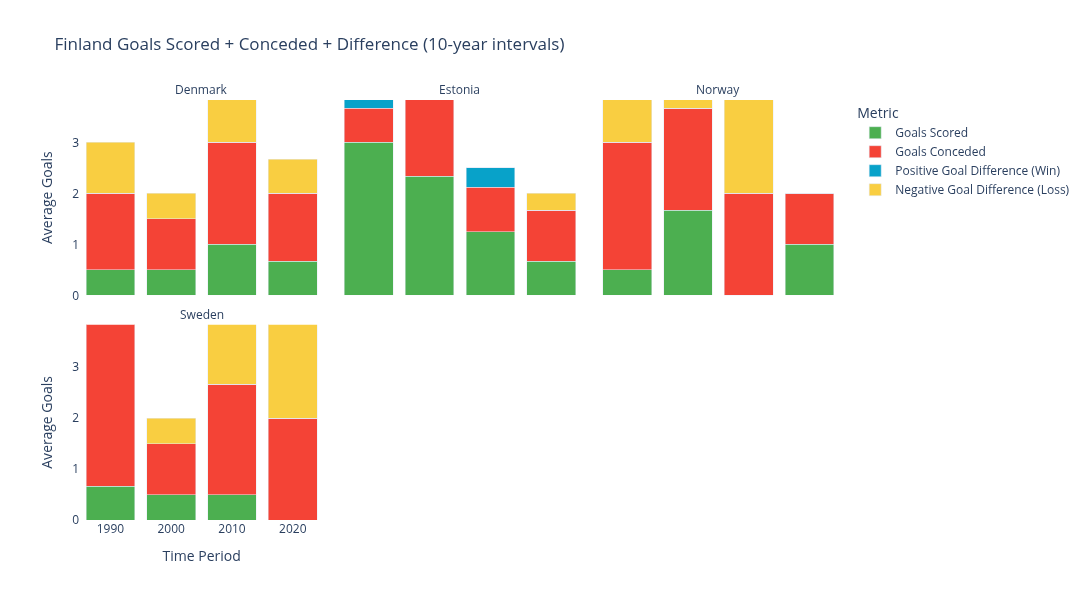

In [129]:
def average_goal_score_conced(df, interval=10, team_1="Finland", opposite_teams=["Sweden", "Norway", "Denmark"], start_year=1990, end_year=2024):
    """
    Analyzes and visualizes average goals scored, conceded, and difference by team_1 against opponents.
    Returns grouped and enhanced stacked charts with goal difference.
    
    Args:
        df: DataFrame containing match data
        interval: Years per time group (default 10)
        team_1: Primary team to analyze (default "Finland")
        opposite_teams: List of opponent teams (default ["Sweden", "Norway", "Denmark"])
        start_year: First year to include (default 1990)
        end_year: Last year to include (default 2024)
    
    Returns:
        Tuple of Plotly figure objects (grouped_fig, stacked_fig)
    """
    import pandas as pd
    import plotly.express as px
    
    # Color scheme
    colors = {
        'Goals_Scored': '#4CAF50',    # Green
        'Goals_Conceded': '#F44336',   # Red
        'Positive_Diff': 'rgb(8, 162, 201)',    # Blue for positive difference
        'Negative_Diff': 'rgb(249, 206, 65)'    # Yellow for negative difference
    }
    
    # Filter by year range
    df = df.copy()
    df['Year'] = pd.to_datetime(df['Date']).dt.year
    df = df[(df['Year'] >= start_year) & (df['Year'] <= end_year)]
    
    # Filter matches where team_1 played against any of the opposite_teams
    matches = df[
        ((df['Home_team'] == team_1) & (df['Away_team'].isin(opposite_teams))) |
        ((df['Away_team'] == team_1) & (df['Home_team'].isin(opposite_teams)))
    ].copy()
    
    # Create time intervals
    matches['Year_Group'] = (matches['Year'] // interval) * interval
    
    # Calculate goals metrics
    matches['Opponent'] = matches.apply(
        lambda x: x['Away_team'] if x['Home_team'] == team_1 else x['Home_team'],
        axis=1
    )
    matches['Goals_Scored'] = matches.apply(
        lambda x: x['home_score'] if x['Home_team'] == team_1 else x['away_score'],
        axis=1
    )
    matches['Goals_Conceded'] = matches.apply(
        lambda x: x['away_score'] if x['Home_team'] == team_1 else x['home_score'],
        axis=1
    )
    matches['Goal_Diff'] = matches['Goals_Scored'] - matches['Goals_Conceded']
    
    # Calculate average metrics by period and opponent
    goals_data = matches.groupby(['Year_Group', 'Opponent']).agg({
        'Goals_Scored': 'mean',
        'Goals_Conceded': 'mean',
        'Goal_Diff': 'mean'
    }).reset_index()
    
    # Prepare data for visualization - split difference into positive and negative components
    goals_data['Positive_Diff'] = goals_data['Goal_Diff'].apply(lambda x: x if x > 0 else 0)
    goals_data['Negative_Diff'] = goals_data['Goal_Diff'].apply(lambda x: abs(x) if x < 0 else 0)
    
    # Melt data for plotting
    plot_data = goals_data.melt(
        id_vars=['Year_Group', 'Opponent'], 
        value_vars=['Goals_Scored', 'Goals_Conceded', 'Positive_Diff', 'Negative_Diff'],
        var_name='Metric', 
        value_name='Average'
    )
    
    # Visualization 1: Grouped Bar Chart (Goals Scored vs Conceded)
    grouped_fig = px.bar(
        plot_data[plot_data['Metric'].isin(['Goals_Scored', 'Goals_Conceded'])],
        x='Year_Group',
        y='Average',
        color='Metric',
        facet_col='Opponent',
        facet_col_wrap=3,
        barmode='group',
        color_discrete_map={
            'Goals_Scored': colors['Goals_Scored'],
            'Goals_Conceded': colors['Goals_Conceded']
        },
        title=f'{team_1} Average Goals Scored vs Conceded ({interval}-year intervals)',
        labels={'Year_Group': 'Time Period', 'Average': 'Average Goals'},
        height=600
    )
    
    # Visualization 2: Enhanced Stacked Bar Chart with Goal Difference
    stacked_fig = px.bar(
        plot_data,
        x='Year_Group',
        y='Average',
        color='Metric',
        facet_col='Opponent',
        facet_col_wrap=3,
        barmode='stack',
        color_discrete_map={
            'Goals_Scored': colors['Goals_Scored'],
            'Goals_Conceded': colors['Goals_Conceded'],
            'Positive_Diff': colors['Positive_Diff'],
            'Negative_Diff': colors['Negative_Diff']
        },
        title=f'{team_1} Goals Scored + Conceded + Difference ({interval}-year intervals)',
        labels={'Year_Group': 'Time Period', 'Average': 'Average Goals'},
        height=600
    )
    
    # Customize both figures
    for fig in [grouped_fig, stacked_fig]:
        fig.update_layout(
            plot_bgcolor='white',
            legend_title_text='Metric',
            yaxis=dict(range=[0, max(plot_data['Average'].max() + 0.5, 3)]),
            showlegend=True
        )
        fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
    
    # Custom legend names for stacked chart
    stacked_fig.for_each_trace(lambda t: t.update(
        name='Positive Goal Difference (Win)' if t.name == 'Positive_Diff' else 
        'Negative Goal Difference (Loss)' if t.name == 'Negative_Diff' else 
        'Goals Scored' if t.name == 'Goals_Scored' else
        'Goals Conceded'
    ))
    
    # Display data tables
    print(f"\n{'='*80}")
    print(f"Goal Analysis for {team_1} vs {', '.join(opposite_teams)}")
    print(f"Time Period: {start_year}-{end_year} ({interval}-year intervals)")
    print(f"{'='*80}")
    
    # Prepare styled tables
    display_data = goals_data.pivot(index='Year_Group', columns='Opponent', 
                                  values=['Goals_Scored', 'Goals_Conceded', 'Goal_Diff'])
    
    def color_diff(val):
        color = colors['Positive_Diff'] if val > 0 else colors['Negative_Diff'] if val < 0 else '#CCCCCC'
        return f'background-color: {color}'
    
    print("\nAverage Goals Scored:")
    display(display_data['Goals_Scored'].style.background_gradient(cmap='Greens', vmin=0))
    
    print("\nAverage Goals Conceded:")
    display(display_data['Goals_Conceded'].style.background_gradient(cmap='Reds', vmin=0))
    
    print("\nAverage Goal Difference:")
    display(display_data['Goal_Diff'].style.map(color_diff))
    
    return grouped_fig, stacked_fig




# Example Usage
df = pd.read_csv("Datasets/Sports_Football_1872_2025.csv")

# Get all visualizations
grouped, stacked = average_goal_score_conced(
    df, interval=10, team_1="Finland", 
    opposite_teams=["Sweden", "Norway", "Denmark", "Estonia"],
    start_year=1990, end_year=2024
)

grouped.show()
stacked.show()

In [147]:
def team_performance_table(df, interval=10, team_1="Finland", opposite_teams=None, start_year=1990, end_year=2024):
    """
    Creates a comprehensive performance table with opponents as columns and metrics as sub-columns.
    
    Args:
        df: DataFrame containing match data
        interval: Years per time group (default 10)
        team_1: Primary team to analyze (default "Finland")
        opposite_teams: List of opponent teams (default ["Sweden", "Norway", "Denmark"])
        start_year: First year to include (default 1990)
        end_year: Last year to include (default 2024)
    
    Returns:
        Styled DataFrame with the requested format
    """
    import pandas as pd
    
    if opposite_teams is None:
        opposite_teams = ["Sweden", "Norway", "Denmark"]
    
    # Filter data
    df = df.copy()
    df['Year'] = pd.to_datetime(df['Date']).dt.year
    df = df[(df['Year'] >= start_year) & (df['Year'] <= end_year)]
    
    # Filter matches
    matches = df[
        ((df['Home_team'] == team_1) & (df['Away_team'].isin(opposite_teams))) |
        ((df['Away_team'] == team_1) & (df['Home_team'].isin(opposite_teams)))
    ].copy()
    
    # Create time groups and identify opponents
    matches['Year_Group'] = (matches['Year'] // interval) * interval
    matches['Opponent'] = matches.apply(
        lambda x: x['Away_team'] if x['Home_team'] == team_1 else x['Home_team'],
        axis=1
    )
    
    # Calculate metrics
    matches['Goals_Scored'] = matches.apply(
        lambda x: x['home_score'] if x['Home_team'] == team_1 else x['away_score'],
        axis=1
    )
    matches['Goals_Conceded'] = matches.apply(
        lambda x: x['away_score'] if x['Home_team'] == team_1 else x['home_score'],
        axis=1
    )
    
    # Create all possible year group and opponent combinations
    year_groups = sorted(matches['Year_Group'].unique())
    if not year_groups:  # If no matches found
        year_groups = list(range((start_year // interval) * interval, 
                          ((end_year // interval) + 1) * interval, 
                          interval))
    
    all_combinations = pd.MultiIndex.from_product(
        [year_groups, opposite_teams],
        names=['Year_Group', 'Opponent']
    )
    
    # Group and aggregate, then reindex to include all combinations
    grouped = matches.groupby(['Year_Group', 'Opponent']).agg({
        'Goals_Scored': ['sum', 'mean', 'std'],
        'Goals_Conceded': ['sum', 'mean', 'std'],
        'Date': 'count'
    }).rename(columns={'Date': 'Matches'})
    
    # Ensure grouped has all combinations even if they don't exist in the data
    grouped = grouped.reindex(all_combinations, fill_value=0)
    
    # Create multi-level columns for display
    metrics = ['Score', 'Conceded', 'Matches']
    columns = pd.MultiIndex.from_product([opposite_teams, metrics])
    display_table = pd.DataFrame(index=year_groups + ['Total', 'Avg', 'Std'], columns=columns)
    
    # Fill the display table
    for opponent in opposite_teams:
        # Yearly data
        for year in year_groups:
            try:
                data = grouped.loc[(year, opponent)]
                display_table.loc[year, (opponent, 'Score')] = int(data[('Goals_Scored', 'sum')])
                display_table.loc[year, (opponent, 'Conceded')] = int(data[('Goals_Conceded', 'sum')])
                display_table.loc[year, (opponent, 'Matches')] = int(data[('Matches', 'count')])
            except KeyError:
                display_table.loc[year, (opponent, 'Score')] = 0
                display_table.loc[year, (opponent, 'Conceded')] = 0
                display_table.loc[year, (opponent, 'Matches')] = 0
        
        # Totals
        opponent_data = grouped.xs(opponent, level='Opponent', drop_level=False)
        total_scored = opponent_data[('Goals_Scored', 'sum')].sum()
        total_conceded = opponent_data[('Goals_Conceded', 'sum')].sum()
        total_matches = opponent_data[('Matches', 'count')].sum()
        
        display_table.loc['Total', (opponent, 'Score')] = int(total_scored)
        display_table.loc['Total', (opponent, 'Conceded')] = int(total_conceded)
        display_table.loc['Total', (opponent, 'Matches')] = int(total_matches)
        
        # Averages - only consider years with matches
        valid_years = [year for year in year_groups if 
                      (year, opponent) in grouped.index and
                      grouped.loc[(year, opponent)][('Matches', 'count')] > 0]
        
        if valid_years:
            avg_scored = opponent_data.loc[opponent_data[('Matches', 'count')] > 0, ('Goals_Scored', 'mean')].mean()
            avg_conceded = opponent_data.loc[opponent_data[('Matches', 'count')] > 0, ('Goals_Conceded', 'mean')].mean()
            
            if not pd.isna(avg_scored):
                display_table.loc['Avg', (opponent, 'Score')] = round(avg_scored, 2)
            else:
                display_table.loc['Avg', (opponent, 'Score')] = 0.0
                
            if not pd.isna(avg_conceded):
                display_table.loc['Avg', (opponent, 'Conceded')] = round(avg_conceded, 2)
            else:
                display_table.loc['Avg', (opponent, 'Conceded')] = 0.0
        else:
            display_table.loc['Avg', (opponent, 'Score')] = 0.0
            display_table.loc['Avg', (opponent, 'Conceded')] = 0.0
        
        display_table.loc['Avg', (opponent, 'Matches')] = ''
        
        # Standard Deviations - only for years with valid data
        valid_std_years = [year for year in year_groups if 
                          (year, opponent) in grouped.index and 
                          grouped.loc[(year, opponent)][('Matches', 'count')] > 1]
        
        if len(valid_std_years) > 1:  # Need at least 2 groups to calculate std
            std_scored = opponent_data.loc[opponent_data[('Matches', 'count')] > 1, ('Goals_Scored', 'std')].std()
            std_conceded = opponent_data.loc[opponent_data[('Matches', 'count')] > 1, ('Goals_Conceded', 'std')].std()
            
            display_table.loc['Std', (opponent, 'Score')] = round(std_scored, 2) if not pd.isna(std_scored) else ''
            display_table.loc['Std', (opponent, 'Conceded')] = round(std_conceded, 2) if not pd.isna(std_conceded) else ''
        else:
            display_table.loc['Std', (opponent, 'Score')] = ''
            display_table.loc['Std', (opponent, 'Conceded')] = ''
            
        display_table.loc['Std', (opponent, 'Matches')] = ''
    
    # Apply styling - fixed version
    styled = display_table.style
    
    # Apply styling separately for each opponent and metric
    for opponent in opposite_teams:
        # Subset indices - only use numeric year indices for gradient
        numeric_indices = [idx for idx in display_table.index if isinstance(idx, (int, float))]
        
        # Score gradient (green)
        styled = styled.background_gradient(
            subset=(numeric_indices, [(opponent, 'Score')]),
            cmap='Greens',
            vmin=0,
            axis=0
        )
        
        # Conceded gradient (red)  
        styled = styled.background_gradient(
            subset=(numeric_indices, [(opponent, 'Conceded')]),
            cmap='Reds',
            vmin=0,
            axis=0
        )
        
        # Matches gradient (blue)
        styled = styled.background_gradient(
            subset=(numeric_indices, [(opponent, 'Matches')]),
            cmap='Blues',
            vmin=0,
            axis=0
        )
    
    # Format borders and alignment
    styled = styled.set_properties(**{
        'border': '1px solid black',
        'text-align': 'center'
    })
    
    # Print header
    print(f"\n{'='*100}")
    print(f"{team_1}'s Performance Against Opponents ({start_year}-{end_year}, {interval}-year intervals)")
    print(f"{'='*100}\n")
    
    # Display the table
    display(styled)
    
    return display_table

# Example Usage
performance_data = team_performance_table(
    df, 
    interval=10, 
    team_1="Finland", 
    opposite_teams=["Sweden", "Norway", "Denmark"],
    start_year=1990, 
    end_year=2020
)




performance_data = team_performance_table(
    df, 
    interval=10, 
    team_1="Sweden", 
    opposite_teams=["Finland", "Norway", "Denmark"],
    start_year=1990, 
    end_year=2020
)


Finland's Performance Against Opponents (1990-2020, 10-year intervals)




Sweden's Performance Against Opponents (1990-2020, 10-year intervals)



In [153]:
def team_performance_table(df, interval=10, team_1="Finland", opposite_teams=None, start_year=1990, end_year=2024):
    """
    Creates a comprehensive performance table with opponents as columns and metrics as sub-columns.
    Applies gradient styling only to yearly data rows (excluding Total, Avg, Std rows).
    
    Args:
        df: DataFrame containing match data
        interval: Years per time group (default 10)
        team_1: Primary team to analyze (default "Finland")
        opposite_teams: List of opponent teams (default ["Sweden", "Norway", "Denmark"])
        start_year: First year to include (default 1990)
        end_year: Last year to include (default 2024)
    
    Returns:
        Styled DataFrame with the requested format
    """
    if opposite_teams is None:
        opposite_teams = ["Sweden", "Norway", "Denmark"]
    
    # Filter data
    df = df.copy()
    df['Year'] = pd.to_datetime(df['Date']).dt.year
    df = df[(df['Year'] >= start_year) & (df['Year'] <= end_year)]
    
    # Filter matches
    matches = df[
        ((df['Home_team'] == team_1) & (df['Away_team'].isin(opposite_teams))) |
        ((df['Away_team'] == team_1) & (df['Home_team'].isin(opposite_teams)))
    ].copy()
    
    # Create time groups and identify opponents
    matches['Year_Group'] = (matches['Year'] // interval) * interval
    matches['Opponent'] = matches.apply(
        lambda x: x['Away_team'] if x['Home_team'] == team_1 else x['Home_team'],
        axis=1
    )
    
    # Calculate metrics
    matches['Goals_Scored'] = matches.apply(
        lambda x: x['home_score'] if x['Home_team'] == team_1 else x['away_score'],
        axis=1
    )
    matches['Goals_Conceded'] = matches.apply(
        lambda x: x['away_score'] if x['Home_team'] == team_1 else x['home_score'],
        axis=1
    )
    
    # Create all possible year group and opponent combinations
    year_groups = sorted(matches['Year_Group'].unique())
    if not year_groups:
        year_groups = range((start_year // interval) * interval, 
                          ((end_year // interval) + 1) * interval, 
                          interval)
    
    # Group and aggregate
    grouped = matches.groupby(['Year_Group', 'Opponent']).agg({
        'Goals_Scored': 'sum',
        'Goals_Conceded': 'sum',
        'Date': 'count'
    }).rename(columns={'Date': 'Matches'}).reset_index()
    
    # Create display table with separate columns for each metric
    display_table = pd.DataFrame(index=year_groups + ['Total', 'Avg', 'Std'])
    
    for opponent in opposite_teams:
        # Filter data for this opponent
        opp_data = grouped[grouped['Opponent'] == opponent]
        
        # Fill yearly data
        for year in year_groups:
            year_data = opp_data[opp_data['Year_Group'] == year]
            if not year_data.empty:
                display_table.loc[year, f"{opponent}_Score"] = int(year_data['Goals_Scored'].iloc[0])
                display_table.loc[year, f"{opponent}_Conceded"] = int(year_data['Goals_Conceded'].iloc[0])
                display_table.loc[year, f"{opponent}_Matches"] = int(year_data['Matches'].iloc[0])
            else:
                display_table.loc[year, f"{opponent}_Score"] = 0
                display_table.loc[year, f"{opponent}_Conceded"] = 0
                display_table.loc[year, f"{opponent}_Matches"] = 0
        
        # Calculate totals
        display_table.loc['Total', f"{opponent}_Score"] = opp_data['Goals_Scored'].sum()
        display_table.loc['Total', f"{opponent}_Conceded"] = opp_data['Goals_Conceded'].sum()
        display_table.loc['Total', f"{opponent}_Matches"] = opp_data['Matches'].sum()
        
        # Calculate averages
        display_table.loc['Avg', f"{opponent}_Score"] = opp_data['Goals_Scored'].mean()
        display_table.loc['Avg', f"{opponent}_Conceded"] = opp_data['Goals_Conceded'].mean()
        
        # Calculate standard deviations
        display_table.loc['Std', f"{opponent}_Score"] = opp_data['Goals_Scored'].std()
        display_table.loc['Std', f"{opponent}_Conceded"] = opp_data['Goals_Conceded'].std()
    
    # Fill NaN values
    display_table = display_table.fillna(0)
    
    # Convert to integers where appropriate
    for col in display_table.columns:
        if '_Matches' in col or ('_Score' in col and 'Avg' not in col and 'Std' not in col) or \
           ('_Conceded' in col and 'Avg' not in col and 'Std' not in col):
            display_table[col] = display_table[col].astype(int)
    
    # Format the display
    styled = display_table.style
    
    # Apply gradient styling only to yearly data rows (excluding Total, Avg, Std)
    yearly_rows = [idx for idx in display_table.index if idx not in ['Total', 'Avg', 'Std']]
    
    for opponent in opposite_teams:
        # Score (green) - only on yearly rows
        styled = styled.background_gradient(
            subset=(yearly_rows, [f"{opponent}_Score"]),
            cmap='Greens',
            vmin=0
        )
        # Conceded (red) - only on yearly rows
        styled = styled.background_gradient(
            subset=(yearly_rows, [f"{opponent}_Conceded"]),
            cmap='Reds',
            vmin=0
        )
        # Matches (blue) - only on yearly rows
        styled = styled.background_gradient(
            subset=(yearly_rows, [f"{opponent}_Matches"]),
            cmap='Blues',
            vmin=0
        )
    
    # Format borders and alignment for all cells
    styled = styled.set_properties(**{
        'border': '1px solid black',
        'text-align': 'center'
    }).format("{:.0f}", subset=[col for col in display_table.columns if 'Matches' in col or 'Score' in col or 'Conceded' in col]) \
      .format("{:.2f}", subset=[col for col in display_table.columns if 'Avg' in str(col) or 'Std' in str(col)])
    
    # Display the table
    print(f"\n{'='*100}")
    print(f"{team_1}'s Performance Against Opponents ({start_year}-{end_year}, {interval}-year intervals)")
    print(f"{'='*100}\n")
    
    display(styled)
    
    return display_table

# Example Usage
performance_data = team_performance_table(
    df, 
    interval=5, 
    team_1="Finland", 
    opposite_teams=["Sweden", "Norway", "Denmark"],
    start_year=2000, 
    end_year=2024
)


Finland's Performance Against Opponents (2000-2024, 5-year intervals)



,Sweden_Score,Sweden_Conceded,Sweden_Matches,Norway_Score,Norway_Conceded,Norway_Matches,Denmark_Score,Denmark_Conceded,Denmark_Matches
2000,2,3,2,3,3,2,1,1,1
2005,0,1,2,2,3,1,0,1,1
2010,1,10,3,0,0,0,1,2,1
2015,2,3,3,0,2,1,0,0,0
2020,0,4,2,1,1,1,2,4,3
Total,5,21,12,6,9,5,4,8,6
Avg,1,4,0,1,2,0,1,2,0
Std,1,3,0,1,0,0,0,1,0


In [155]:
def match_result_analysis(df, interval=10, team_1="Finland", opposite_teams=["Sweden", "Norway"], start_year=1990, end_year=2022):
    """
    Analyze match results between a team and its opponents over specified time intervals.
    
    Parameters:
    -----------
    df : pandas DataFrame
        DataFrame containing football match data
    interval : int
        Time interval in years to group the data
    team_1 : str
        The main team to analyze
    opposite_teams : list
        List of opponent teams to analyze against
    start_year : int
        Starting year for analysis
    end_year : int
        Ending year for analysis
    
    Returns:
    --------
    pandas DataFrame
        DataFrame with match statistics by time period
    """
    # Extract year from date
    df['Year'] = pd.to_datetime(df['Date']).dt.year
    
    # Filter by year range
    filtered_df = df[(df['Year'] >= start_year) & (df['Year'] <= end_year)]
    
    # Create year groups
    filtered_df['Year_Group'] = (filtered_df['Year'] // interval) * interval
    
    # Initialize result dictionary
    results = {}
    
    # Generate year groups
    year_groups = range((start_year // interval) * interval, 
                        ((end_year // interval) + 1) * interval, 
                        interval)
    
    # Process each year group
    for year_group in year_groups:
        results[year_group] = {}
        
        # Process each opponent
        for opponent in opposite_teams:
            # Initialize stats for this opponent and period
            results[year_group][opponent] = {'Win': 0, 'Loss': 0, 'Draw': 0, 'Total': 0}
            
            # Get matches between team_1 and opponent in this period
            matches = filtered_df[
                (filtered_df['Year_Group'] == year_group) & 
                (
                    ((filtered_df['Home_team'] == team_1) & (filtered_df['Away_team'] == opponent)) |
                    ((filtered_df['Home_team'] == opponent) & (filtered_df['Away_team'] == team_1))
                )
            ]
            
            # Count total matches
            results[year_group][opponent]['Total'] = len(matches)
            
            if len(matches) == 0:
                continue
                
            # Analyze each match
            for _, match in matches.iterrows():
                if match['Home_team'] == team_1:
                    if match['home_score'] > match['away_score']:
                        results[year_group][opponent]['Win'] += 1
                    elif match['home_score'] < match['away_score']:
                        results[year_group][opponent]['Loss'] += 1
                    else:
                        results[year_group][opponent]['Draw'] += 1
                else:  # team_1 is away
                    if match['away_score'] > match['home_score']:
                        results[year_group][opponent]['Win'] += 1
                    elif match['away_score'] < match['home_score']:
                        results[year_group][opponent]['Loss'] += 1
                    else:
                        results[year_group][opponent]['Draw'] += 1
    
    # Create DataFrame for pretty output
    # Initialize lists to store data
    rows = []
    
    # Calculate totals and metrics
    totals = {opponent: {'Win': 0, 'Loss': 0, 'Draw': 0, 'Total': 0} for opponent in opposite_teams}
    
    # Fill in the data
    for year_group in year_groups:
        row = {'Year_Group': year_group}
        
        for opponent in opposite_teams:
            stats = results[year_group][opponent]
            for stat_type, value in stats.items():
                row[f"{opponent}_{stat_type}"] = value
                totals[opponent][stat_type] += value
        
        rows.append(row)
    
    # Add totals row
    total_row = {'Year_Group': 'Total'}
    for opponent in opposite_teams:
        for stat_type, value in totals[opponent].items():
            total_row[f"{opponent}_{stat_type}"] = value
    rows.append(total_row)
    
    # Calculate averages (excluding years with zero matches)
    avg_row = {'Year_Group': 'Average'}
    for opponent in opposite_teams:
        for stat_type in ['Win', 'Loss', 'Draw', 'Total']:
            # Count non-zero periods
            non_zero_periods = sum(1 for year_group in year_groups 
                                    if results[year_group][opponent]['Total'] > 0)
            
            if non_zero_periods > 0:
                avg_row[f"{opponent}_{stat_type}"] = round(totals[opponent][stat_type] / non_zero_periods, 2)
            else:
                avg_row[f"{opponent}_{stat_type}"] = 0
    rows.append(avg_row)
    
    # Calculate standard deviation
    std_row = {'Year_Group': 'Std Dev'}
    for opponent in opposite_teams:
        for stat_type in ['Win', 'Loss', 'Draw', 'Total']:
            values = [results[year_group][opponent][stat_type] for year_group in year_groups]
            # Filter out periods with no matches for std calculation
            values = [v for v, t in zip(values, [results[year_group][opponent]['Total'] for year_group in year_groups]) if t > 0]
            
            if len(values) > 1:  # Need at least 2 values for std dev
                std_row[f"{opponent}_{stat_type}"] = round(pd.Series(values).std(), 2)
            else:
                std_row[f"{opponent}_{stat_type}"] = 0
    rows.append(std_row)
    
    result_df = pd.DataFrame(rows)
    
    return result_df

# Example usage:
result_table = match_result_analysis(df, interval=10, team_1="Finland", 
                                      opposite_teams=["Sweden", "Norway"], 
                                    start_year=1990, end_year=2020)
display(result_table)

/tmp/ipykernel_379651/4112891302.py:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Year_Group,Sweden_Win,Sweden_Loss,Sweden_Draw,Sweden_Total,Norway_Win,Norway_Loss,Norway_Draw,Norway_Total
0,1990,0.0,3.0,0.00,3.00,0.00,1.00,1.00,2.0
1,2000,1.0,2.0,1.00,4.00,1.00,2.00,0.00,3.0
2,2010,2.0,4.0,0.00,6.00,0.00,1.00,0.00,1.0
3,2020,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0
4,Total,3.0,9.0,1.00,13.00,1.00,4.00,1.00,6.0
5,Average,1.0,3.0,0.33,4.33,0.33,1.33,0.33,2.0
6,Std Dev,1.0,1.0,0.58,1.53,0.58,0.58,0.58,1.0
